# Constructing a Polynomial Regression: An Example

In [168]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


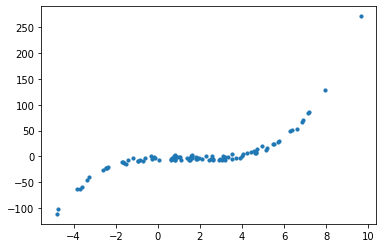

In [244]:
#Building a dummy dataset with 100 data points 

np.random.seed(0)
# np.random.normal creates a random normally distributed dataset
# ( begin, stepsize, # of datapoints)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

plt.scatter(x,y, s=10)
plt.show()

## Linear Regression

In [230]:
#spliting the data [80:20]
x_train = x[:-20]
y_train = y[:-20]

x_test = x[-20:]
y_test = y[-20:]
yhat_train_pred = None

Model weights: 
[[11.4160685]]


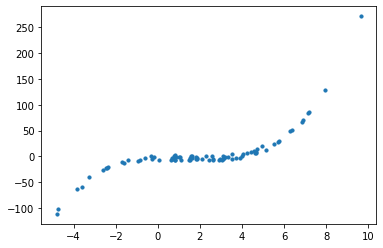

In [231]:
model = LinearRegression()
model.fit(x_train, y_train)
print("Model weights: ")
print(model.coef_)

#here, we call predict on the training set because we want to see the fit of the model on the training set. 
yhat_train_pred = model.predict(x_train)
yhat_test_pred = model.predict(x_test)

# Let's plot our subset of data in this case 80% of our data. 
# Does it look the same as above?
plt.scatter(x_train, y_train, s=10)
plt.show()


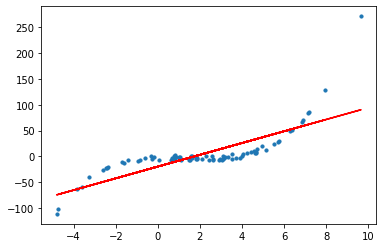

In [232]:
# Here we plot our regression line
# How does it fit? we can evaluate our MSE but also simply see that we can do better!
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, yhat_train_pred, color='r')
plt.show()

In [233]:
# Let's check our error
rmse = np.sqrt(mean_squared_error(y_train,yhat_train_pred))
r2 = r2_score(y_train,yhat_train_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 27.823345591088774
Training R2: 0.605330642166617


In [234]:
rmse = np.sqrt(mean_squared_error(y_test,yhat_test_pred))
r2 = r2_score(y_test,yhat_test_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 17.397646191160849
Training R2: 0.421299699834791


## Constructing a 2nd order Polynomail Regression

In [245]:
#Rebuilding a dummy dataset with 100 data points 

np.random.seed(0)
# np.random.normal creates a random normally distributed dataset
# ( begin, stepsize, # of datapoints)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]


In [246]:
#  Generate a new feature matrix consisting of all polynomial combinations of the 
## features with degree less than or equal to the specified degree. For example, 
## if an input sample is two dimensional and of the form [a, b], 
## the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
print('Polynomial Features: [1,x,x**2]')
print(x_poly[0])

Polynomial Features: [1,x,x**2]
[ 1.         -3.29215704 10.83829796]


In [247]:
#Subset the data
x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

In [248]:
model = LinearRegression()
model.fit(x_poly_train, y_train)
yhat_train_pred = model.predict(x_poly_train)
yhat_test_pred = model.predict(x_poly_test)

print("Model weights: ")
print(model.coef_)

Model weights: 
[[0.         7.22599268 1.0992131 ]]


In [249]:
rmse = np.sqrt(mean_squared_error(y_train,yhat_train_pred))
r2 = r2_score(y_train,yhat_train_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 24.395169585394576
Training R2: 0.696595238721916


In [250]:
rmse = np.sqrt(mean_squared_error(y_test,yhat_test_pred))
r2 = r2_score(y_test,yhat_test_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 18.958147188630612
Training R2: 0.312829511125536


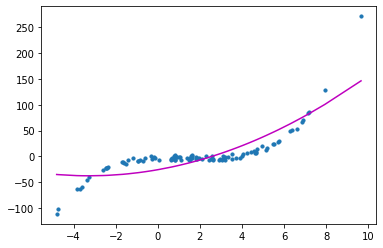

In [251]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,yhat_train_pred), key=sort_axis)
x_poly_train, yhat_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, yhat_train_pred, color='m')
plt.show()

## Polynomial Regresion 3rd order

In [257]:
#Building a dummy dataset with 100 data points 

np.random.seed(0)
# np.random.normal creates a random normally distributed dataset
# ( begin, stepsize, # of datapoints)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]


In [258]:
#  Generate a new feature matrix consisting of all polynomial combinations of the 
## features with degree less than or equal to the specified degree. 
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
print('Polynomial Features: [1,x,x**2,x**3]')
print(x_poly[0])

Polynomial Features: [1,x,x**2,x**3]
[  1.          -3.29215704  10.83829796 -35.68137892]


In [259]:
# subset the data
x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

In [260]:
model = LinearRegression()
model.fit(x_poly_train, y_train)
yhat_train_pred = model.predict(x_poly_train)
yhat_test_pred = model.predict(x_poly_test)

print("Model weights: ")
print(model.coef_)

Model weights: 
[[ 0.          0.90216542 -2.01095101  0.50074037]]


In [261]:
rmse = np.sqrt(mean_squared_error(y_train,yhat_train_pred))
r2 = r2_score(y_train,yhat_train_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 2.991353849540037
Training R2: 0.995438052457929


In [262]:
rmse = np.sqrt(mean_squared_error(y_test,yhat_test_pred))
r2 = r2_score(y_test,yhat_test_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 3.431740027623191
Training R2: 0.977483469140174


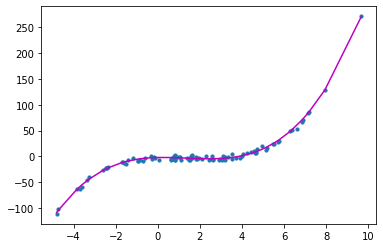

In [263]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,yhat_train_pred), key=sort_axis)
x_poly_train, yhat_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, yhat_train_pred, color='m')
plt.show()

## Multiorder polynomial

In [277]:
#Building a dummy dataset with 100 data points 

np.random.seed(0)
# np.random.normal creates a random normally distributed dataset
# ( begin, stepsize, # of datapoints)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]


In [278]:
#Using the same Dummy Dataset
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]


In [279]:
#  Generate a new feature matrix consisting of all polynomial combinations of the 
## features with degree less than or equal to the specified degree. 
polynomial_features= PolynomialFeatures(degree=15)
x_poly = polynomial_features.fit_transform(x)

x_poly_train = x_poly[:-20]
y_train = y[:-20]

x_poly_test = x_poly[-20:]
y_test = y[-20:]

In [280]:
model = LinearRegression()
model.fit(x_poly_train, y_train)
yhat_train_pred = model.predict(x_poly_train)
yhat_test_pred = model.predict(x_poly_test)

print("Model weights: ")
print(model.coef_)

Model weights: 
[[ 0.00000000e+00  8.61227274e-01 -5.56886301e-01  7.93181459e-01
  -4.68692320e-01 -8.48028070e-02  8.64618511e-02  3.43521356e-03
  -7.72695788e-03  5.67112780e-04  2.84023084e-04 -4.78462777e-05
  -1.55493378e-06  9.33571388e-07 -7.99616701e-08  2.25756092e-09]]


In [282]:
rmse = np.sqrt(mean_squared_error(y_train,yhat_train_pred))
r2 = r2_score(y_train,yhat_train_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 2.823489465657719
Training R2: 0.995935687880322


In [283]:
rmse = np.sqrt(mean_squared_error(y_test,yhat_test_pred))
r2 = r2_score(y_test,yhat_test_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

Training RMSE: 3.093365692718381
Training R2: 0.981704880614407


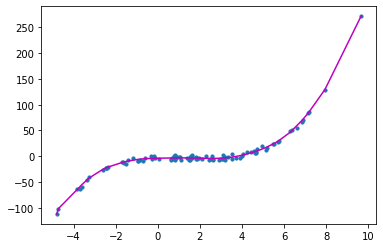

In [284]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,yhat_train_pred), key=sort_axis)
x_poly_train, yhat_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, yhat_train_pred, color='m')
plt.show()